In [1]:
#Install once
#!pip install imbalanced-learn
#!pip install delayed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')  
test = pd.read_csv('data/test.csv')

train.head()

,user_state,click,screen_resolution,video,score,reviews,editors_choice,price,iap,installs
0,TX,0,921600,1,4.3,155129,False,0.0,True,10000000
1,IL,0,921600,1,4.3,155129,False,0.0,True,10000000
2,FL,0,4096000,1,4.3,155129,False,0.0,True,10000000
3,FL,0,921600,1,4.3,155129,False,0.0,True,10000000
4,FL,0,4096000,1,4.3,155129,False,0.0,True,10000000


In [3]:
state_train = pd.get_dummies(train.user_state, prefix='state')
train = pd.concat([train, state_train], axis=1)
train.drop(['user_state'], axis=1, inplace=True)

state_test = pd.get_dummies(test.user_state, prefix='state')
test = pd.concat([test, state_test], axis=1)
test.drop(['user_state'], axis=1, inplace=True)

print(f'Click percent in train data: {train.click.sum()/train.shape[0]*100}')
print(f'Click percent in test data: {test.click.sum()/test.shape[0]*100}')

train.head()

Click percent in train data: 7.085805742490704
Click percent in test data: 7.876716084038773


,click,screen_resolution,video,score,reviews,editors_choice,price,iap,installs,state_AK,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,921600,1,4.3,155129,False,0.0,True,10000000,0,...,0,0,1,0,0,0,0,0,0,0
1,0,921600,1,4.3,155129,False,0.0,True,10000000,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4096000,1,4.3,155129,False,0.0,True,10000000,0,...,0,0,0,0,0,0,0,0,0,0
3,0,921600,1,4.3,155129,False,0.0,True,10000000,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4096000,1,4.3,155129,False,0.0,True,10000000,0,...,0,0,0,0,0,0,0,0,0,0


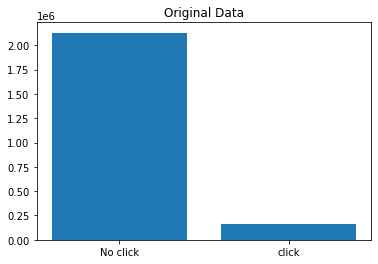

In [12]:
#Imbalanced data

X_train = train.drop('click', axis=1)
y_train = train['click']

X_test = test.drop('click', axis=1)
y_test = test['click']


plt.bar(['No click', 'click'], height=[sum(y_train==0), sum(y_train==1)])
plt.title('Original Data')
plt.show()

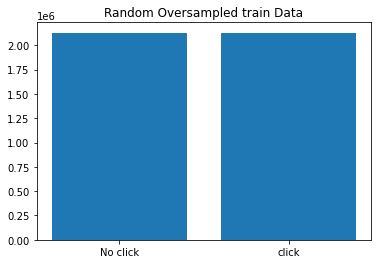

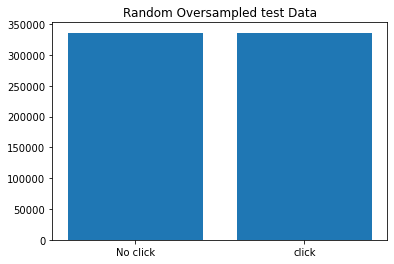

In [13]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over_train, y_over_train = oversampler.fit_resample(X_train, y_train)
X_over_test, y_over_test = oversampler.fit_resample(X_test, y_test)

plt.bar(['No click', 'click'], height=[sum(y_over_train==0), sum(y_over_train==1)])
plt.title('Random Oversampled train Data')
plt.show()

plt.bar(['No click', 'click'], height=[sum(y_over_test==0), sum(y_over_test==1)])
plt.title('Random Oversampled test Data')
plt.show()



In [ ]:
X_train = train.drop('click',axis = 1)
y_train = train['click']

X_test = test.drop('click',axis = 1)
y_test = test['click']

In [17]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_over_train, y_over_train)

RandomForestClassifier(max_depth=10)

In [19]:
y_over_pred= rf.predict(X_over_test)
print(confusion_matrix(y_over_test, y_over_pred))
print(classification_report(y_over_test, y_over_pred))

[[137546 198505]
 [ 95313 240738]]
              precision    recall  f1-score   support

           0       0.59      0.41      0.48    336051
           1       0.55      0.72      0.62    336051

    accuracy                           0.56    672102
   macro avg       0.57      0.56      0.55    672102
weighted avg       0.57      0.56      0.55    672102

